In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145714&authkey=ACWhFouJ6_327I8"

--2019-05-08 15:23:44--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145714&authkey=ACWhFouJ6_327I8
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://kmowyq.am.files.1drv.com/y4mqMgXn8NSZy43UyNG2ZoPZBU9fyIiKDw-1IAtJxo1F7FQxmr8cH3E5nMxoeFm00--JfTNgKUATdLBgK9MEG103iWDC3NX1qNt8rqWT2MqiVamsTL8WWWM2HvlEx22GEmOdjaM56bd-S51H6FVN3gKkBvkA2n87gdKXQR4Ah6JOXAEFMZYCe1ICaeiOAorklv5j1RkM9C-ogmfEjKYNmHvsg/PUC_UFPR05_04_50_50.zip?download&psid=1 [following]
--2019-05-08 15:23:45--  https://kmowyq.am.files.1drv.com/y4mqMgXn8NSZy43UyNG2ZoPZBU9fyIiKDw-1IAtJxo1F7FQxmr8cH3E5nMxoeFm00--JfTNgKUATdLBgK9MEG103iWDC3NX1qNt8rqWT2MqiVamsTL8WWWM2HvlEx22GEmOdjaM56bd-S51H6FVN3gKkBvkA2n87gdKXQR4Ah6JOXAEFMZYCe1ICaeiOAorklv5j1RkM9C-ogmfEjKYNmHvsg/PUC_UFPR05_04_50_50.zip?download&psid=1
Resolving kmowyq.am.files.1drv.com (k

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45714&authkey=ACWhFouJ6_327I8"

replace PUC_UFPR05_04_50_50/test/Empty/2012-09-11_15_16_58#004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PUC_UFPR05_04_50_50/test/Empty/2012-09-11_15_16_58#011.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import os


data_dir = './PUC_UFPR05_04_50_50'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(60, 60, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 58, 58, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                43280     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total para

In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)



test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(60, 60),
        batch_size=256,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(60, 60),
        batch_size=200,
        class_mode='binary'
        )

Found 347924 images belonging to 2 classes.
Found 347927 images belonging to 2 classes.


In [0]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=162, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=111, 
                              callbacks=[es], 
                             )

Epoch 1/100
162/162 [==============================] - 180s 1s/step - loss: 0.0096 - acc: 0.9977 - val_loss: 0.0161 - val_acc: 0.9959
Epoch 2/100
162/162 [==============================] - 183s 1s/step - loss: 0.0303 - acc: 0.9904 - val_loss: 0.0118 - val_acc: 0.9966
Epoch 3/100
  2/162 [..............................] - ETA: 25s - loss: 0.0058 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.238640). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.187194). Check your callbacks.
  % delta_t_median)


  4/162 [..............................] - ETA: 32s - loss: 0.0075 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.137098). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.136423). Check your callbacks.
  % delta_t_median)


  7/162 [>.............................] - ETA: 25s - loss: 0.0097 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135748). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 184s 1s/step - loss: 0.0135 - acc: 0.9967 - val_loss: 0.0118 - val_acc: 0.9973
Epoch 4/100
  7/162 [>.............................] - ETA: 28s - loss: 0.0104 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125891). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 184s 1s/step - loss: 0.0121 - acc: 0.9969 - val_loss: 0.0098 - val_acc: 0.9975
Epoch 5/100
  1/162 [..............................] - ETA: 21s - loss: 0.0185 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113501). Check your callbacks.
  % delta_t_median)


  2/162 [..............................] - ETA: 34s - loss: 0.0134 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.167025). Check your callbacks.
  % delta_t_median)


  8/162 [>.............................] - ETA: 24s - loss: 0.0076 - acc: 0.9985

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125173). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 185s 1s/step - loss: 0.0095 - acc: 0.9978 - val_loss: 0.0106 - val_acc: 0.9970
Epoch 6/100
162/162 [==============================] - 176s 1s/step - loss: 0.0105 - acc: 0.9972 - val_loss: 0.0109 - val_acc: 0.9976
Epoch 7/100
  4/162 [..............................] - ETA: 20s - loss: 0.0082 - acc: 0.9961

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102198). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 164s 1s/step - loss: 0.0103 - acc: 0.9975 - val_loss: 0.0124 - val_acc: 0.9975
Epoch 8/100
  5/162 [..............................] - ETA: 29s - loss: 0.0277 - acc: 0.9945

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.222951). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.176279). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 159s 983ms/step - loss: 0.0089 - acc: 0.9976 - val_loss: 0.0110 - val_acc: 0.9975
Epoch 9/100
162/162 [==============================] - 155s 956ms/step - loss: 0.0080 - acc: 0.9981 - val_loss: 0.0102 - val_acc: 0.9982
Epoch 10/100
  2/162 [..............................] - ETA: 32s - loss: 0.0156 - acc: 0.9980

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208228). Check your callbacks.
  % delta_t_median)


  9/162 [>.............................] - ETA: 18s - loss: 0.0152 - acc: 0.9978

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115454). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 153s 947ms/step - loss: 0.0089 - acc: 0.9978 - val_loss: 0.0086 - val_acc: 0.9981
Epoch 11/100
  3/162 [..............................] - ETA: 27s - loss: 0.0160 - acc: 0.9948

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.126741). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.130504). Check your callbacks.
  % delta_t_median)


 11/162 [=>............................] - ETA: 17s - loss: 0.0083 - acc: 0.9968

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100143). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 154s 951ms/step - loss: 0.0092 - acc: 0.9978 - val_loss: 0.0095 - val_acc: 0.9982
Epoch 12/100
  3/162 [..............................] - ETA: 32s - loss: 0.0037 - acc: 0.9987

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.239607). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 153s 943ms/step - loss: 0.0079 - acc: 0.9983 - val_loss: 0.0116 - val_acc: 0.9974
Epoch 13/100
162/162 [==============================] - 153s 942ms/step - loss: 0.0088 - acc: 0.9983 - val_loss: 0.0074 - val_acc: 0.9983
Epoch 14/100
162/162 [==============================] - 151s 934ms/step - loss: 0.0093 - acc: 0.9980 - val_loss: 0.0089 - val_acc: 0.9982
Epoch 15/100
  3/162 [..............................] - ETA: 23s - loss: 0.0075 - acc: 0.9987

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.214172). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115848). Check your callbacks.
  % delta_t_median)


  5/162 [..............................] - ETA: 26s - loss: 0.0051 - acc: 0.9992

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146405). Check your callbacks.
  % delta_t_median)


 11/162 [=>............................] - ETA: 18s - loss: 0.0033 - acc: 0.9996

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129964). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 151s 931ms/step - loss: 0.0071 - acc: 0.9986 - val_loss: 0.0093 - val_acc: 0.9979
Epoch 16/100
  2/162 [..............................] - ETA: 36s - loss: 0.0017 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.335202). Check your callbacks.
  % delta_t_median)
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170371). Check your callbacks.
  % delta_t_median)


162/162 [==============================] - 157s 969ms/step - loss: 0.0073 - acc: 0.9981 - val_loss: 0.0097 - val_acc: 0.9974
Epoch 17/100
162/162 [==============================] - 163s 1s/step - loss: 0.0073 - acc: 0.9985 - val_loss: 0.0090 - val_acc: 0.9982
Epoch 18/100
162/162 [==============================] - 162s 1s/step - loss: 0.0087 - acc: 0.9980 - val_loss: 0.0092 - val_acc: 0.9980


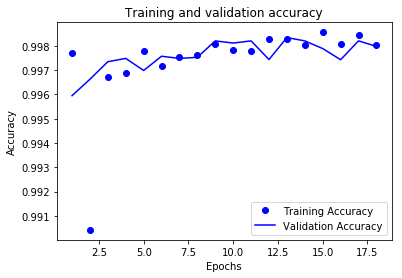

In [0]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU"

--2019-05-08 17:51:09--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mwrg1q.am.files.1drv.com/y4mGrOwJbCY3w_Dk59qVuWddrlMLBGEdpvxAYcFv0VFcU1Gt4m-jEfwaIS1TdXyHg_SNCO611ECqu2V5zzuj6mJfL52_PQDxkDjjftht-xtgBI8uilzAI5UTZ7lsh0sI24-WPn953s86_99uIE8r0QtfvTb4LFYwOfu4ScxR61IZglTCcZncMcWtc7lcqp4ObfBsBthADsUqglU61-3vRiH1g/CNR_TEST.zip?download&psid=1 [following]
--2019-05-08 17:51:09--  https://mwrg1q.am.files.1drv.com/y4mGrOwJbCY3w_Dk59qVuWddrlMLBGEdpvxAYcFv0VFcU1Gt4m-jEfwaIS1TdXyHg_SNCO611ECqu2V5zzuj6mJfL52_PQDxkDjjftht-xtgBI8uilzAI5UTZ7lsh0sI24-WPn953s86_99uIE8r0QtfvTb4LFYwOfu4ScxR61IZglTCcZncMcWtc7lcqp4ObfBsBthADsUqglU61-3vRiH1g/CNR_TEST.zip?download&psid=1
Resolving mwrg1q.am.files.1drv.com (mwrg1q.am.files.1drv.co

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45681&authkey=AIicdVtkBEkQgvU"

In [29]:
temp = os.path.join("./CNR", 'test')

test_generator = test_datagen.flow_from_directory(
        temp,
        target_size=(60, 60),
        batch_size=200,
        class_mode='binary'
        )


model.evaluate_generator(test_generator,20)

Found 144965 images belonging to 2 classes.


[0.45192054361104966, 0.8850000083446503]